To Do:
1. Rerun the data on the AUS split datasets (pca/split_data/Categorical)
3. Run / create PCA module (pca/pca_data/Categorical)
2. Put all results into CSV (y_test vs. y_predict) for each PCA and normal

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import precision_recall_curve

In [11]:
# data gathering
x_train = pd.read_csv('../pca/split_data/AUS_WITH_WEATHER_2022__categorical_train.csv', sep=',', encoding='utf-8')
x_test = pd.read_csv('../pca/split_data/AUS_WITH_WEATHER_2022__categorical_test.csv', sep=',', encoding='utf-8')

y_train = x_train['DEP_DEL15']
x_train = x_train.drop(['DEP_DEL15'], axis=1)
x_train = x_train.drop(['DEP_DELAY'], axis=1)
# x_train = x_train.drop(['DEP_TIME'], axis=1)
# x_train = x_train.drop(['DEP_DELAY_GROUP'], axis=1)
x_train = x_train.drop(['Unnamed: 0'], axis=1)
# x_train = x_train.drop(['ARR_DEL15'], axis=1)
# x_train = x_train.drop(['ARR_DELAY'], axis=1)
# x_train = x_train.drop(['ARR_TIME'], axis=1)
# x_train = x_train.drop(['ARR_DELAY_GROUP'], axis=1)

y_test = x_test['DEP_DEL15']
x_test = x_test.drop(['DEP_DEL15'], axis=1)
x_test = x_test.drop(['DEP_DELAY'], axis=1)
# x_test = x_test.drop(['DEP_TIME'], axis=1)
# x_test = x_test.drop(['DEP_DELAY_GROUP'], axis=1)
x_test = x_test.drop(['Unnamed: 0'], axis=1)
# x_test = x_test.drop(['ARR_DEL15'], axis=1)
# x_test = x_test.drop(['ARR_DELAY'], axis=1)
# x_test = x_test.drop(['ARR_TIME'], axis=1)
# x_test = x_test.drop(['ARR_DELAY_GROUP'], axis=1)

print(x_train.columns)

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID',
       'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP',
       'temp', 'dew', 'humidity', 'precip', 'precipprob', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'severerisk', 'p_ice', 'p_rain', 'p_snow', 'p_fzrain',
       'c_rain', 'c_snow', 'c_overcast', 'c_partlycloudy', 'c_ice',
       'c_fzdrizrain'],
      dtype='object')


Accuracy: 0.7767647465119492
[0.28571429 0.05847953 0.22641509 ... 0.84615385 0.0782726  0.0999146 ]


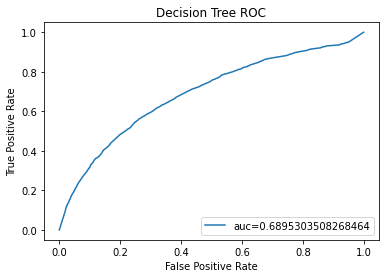

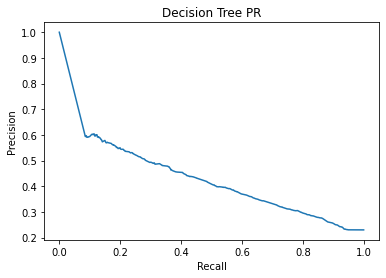

PR AUC: 0.4151548696925819
[[15725   997]
 [ 3851  1144]]


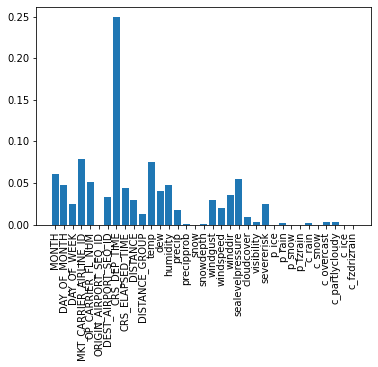

In [12]:
# Trees

from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

clf = DecisionTreeClassifier(random_state=42, max_depth=13)
clf.fit(x_train, y_train)
tree_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, tree_pred))
tree_pred_proba = clf.predict_proba(x_test)[::,1]
print(tree_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  tree_pred_proba)
auc = roc_auc_score(y_test, tree_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("Decision Tree ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, tree_pred_proba)
plt.plot(recall, precision)
plt.title("Decision Tree PR")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
print("PR AUC:", metrics.average_precision_score(y_test, tree_pred_proba))

print(confusion_matrix(y_test, tree_pred))
plt.bar(clf.feature_names_in_, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.7699958557811852
[0. 0. 0. ... 0. 0. 0.]
32
[0.23766245 0.12128385 0.10497612 ... 0.21563894 0.15821345 0.12865377]


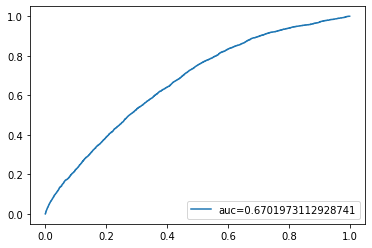

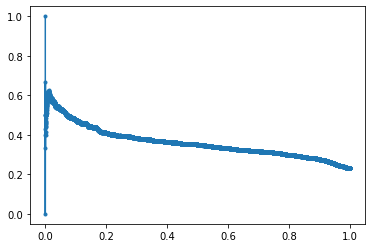

[[16706    16]
 [ 4979    16]]


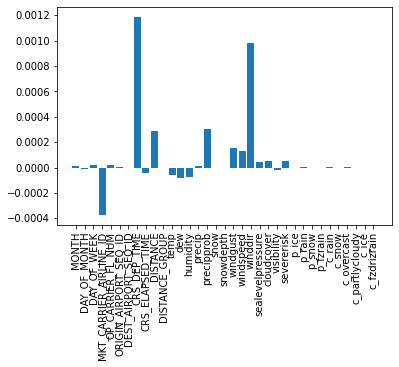

In [61]:
# Logistic Regression

clf = LogisticRegression(random_state=42, max_iter=1000, C=2, penalty='l2')
clf.fit(x_train, y_train)
log_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, log_pred))
print(log_pred)
count = 0
for val in log_pred:
    if val == 1:
        count +=1
print(count)
log_pred_proba = clf.predict_proba(x_test)[::,1]
print(log_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  log_pred_proba)
auc = roc_auc_score(y_test, log_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("Logistic Regression ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, log_pred_proba)
plt.plot(recall, precision, marker='.')
plt.title("Logistic Regression PR")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
print("PR AUC:", metrics.average_precision_score(y_test, log_pred_proba)

print(confusion_matrix(y_test, log_pred))
plt.bar(clf.feature_names_in_, clf.coef_[0])
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.7699958557811852
[0. 0. 0. ... 0. 0. 0.]


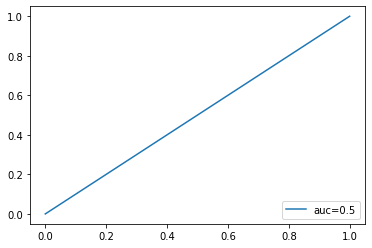

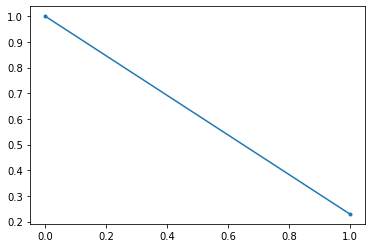

[[16722     0]
 [ 4995     0]]


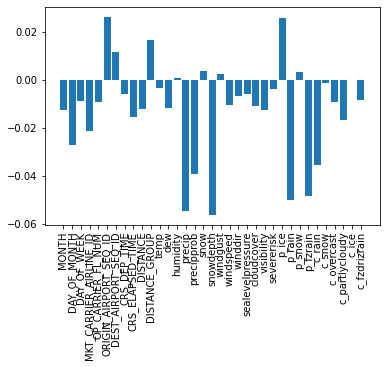

In [63]:
# MLP

# clf = MLPClassifier(random_state=42).fit(x_train, y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# y_pred_proba = clf.predict_proba(X_test)[::,1]
# print(y_pred_proba)
# fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
# auc = roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

# print(confusion_matrix(y_test, y_pred))
# print(clf.coefs_)
# print(clf.n_layers_)
# print(clf.feature_names_in_)
# plt.bar(clf.feature_names_in_, clf.coefs_[0].mean(axis=1))
# plt.xticks(rotation=90)
# plt.show()

clf = MLPClassifier(random_state=42)
clf.fit(x_train, y_train)
mlp_pred = clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, mlp_pred))
mlp_pred_proba = clf.predict_proba(x_test)[::,1]
print(mlp_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  mlp_pred_proba)
auc = roc_auc_score(y_test, mlp_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("MLP ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, mlp_pred_proba)
plt.plot(recall, precision, marker='.')
plt.title("MLP PR")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
print("PR AUC:", metrics.average_precision_score(y_test, mlp_pred_proba))

print(confusion_matrix(y_test, mlp_pred))
plt.bar(clf.feature_names_in_, clf.coefs_[0].mean(axis=1))
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.7871252935488328
[0.10695    0.1679402  0.01728598 ... 0.5974336  0.11672229 0.048452  ]


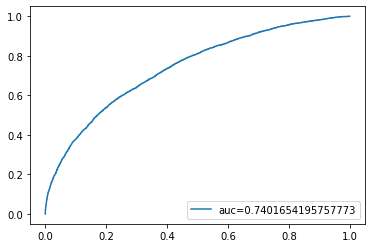

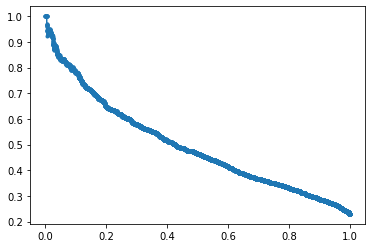

[[15476  1246]
 [ 3377  1618]]


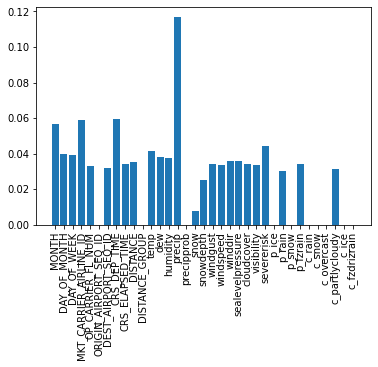

In [65]:
# XGBoost

import xgboost

clf = xgboost.XGBClassifier(random_state=42, max_depth=13)

clf.fit(x_train, y_train)
xgb_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, xgb_pred))
xgb_pred_proba = clf.predict_proba(x_test)[::,1]
print(xgb_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  xgb_pred_proba)
auc = roc_auc_score(y_test, xgb_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("XGBoost ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, xgb_pred_proba)
plt.plot(recall, precision, marker='.')
plt.title("XGBoost PR")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
print("PR AUC:", metrics.average_precision_score(y_test, xgb_pred_proba))

print(confusion_matrix(y_test, xgb_pred))
plt.bar(clf.feature_names_in_, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Learning rate set to 0.061302
0:	learn: 0.6684462	total: 163ms	remaining: 2m 43s
1:	learn: 0.6476794	total: 176ms	remaining: 1m 27s
2:	learn: 0.6291663	total: 188ms	remaining: 1m 2s
3:	learn: 0.6138308	total: 202ms	remaining: 50.2s
4:	learn: 0.5992095	total: 216ms	remaining: 43.1s
5:	learn: 0.5865124	total: 231ms	remaining: 38.3s
6:	learn: 0.5762579	total: 244ms	remaining: 34.6s
7:	learn: 0.5674138	total: 264ms	remaining: 32.7s
8:	learn: 0.5586141	total: 283ms	remaining: 31.1s
9:	learn: 0.5513536	total: 297ms	remaining: 29.4s
10:	learn: 0.5445847	total: 310ms	remaining: 27.9s
11:	learn: 0.5390757	total: 320ms	remaining: 26.4s
12:	learn: 0.5339971	total: 331ms	remaining: 25.2s
13:	learn: 0.5297437	total: 343ms	remaining: 24.2s
14:	learn: 0.5260492	total: 359ms	remaining: 23.5s
15:	learn: 0.5225126	total: 372ms	remaining: 22.9s
16:	learn: 0.5190266	total: 387ms	remaining: 22.4s
17:	learn: 0.5163377	total: 400ms	remaining: 21.8s
18:	learn: 0.5138555	total: 413ms	remaining: 21.3s
19:	learn

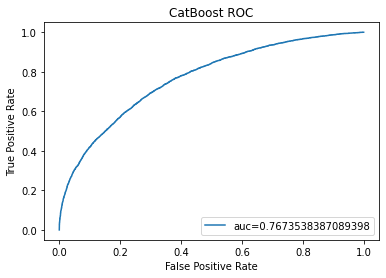

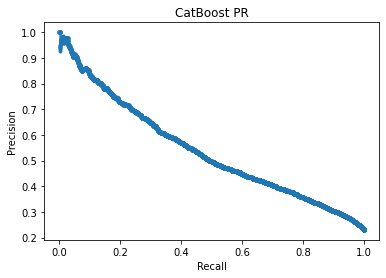

PR AUC: 0.5403419612973817
[[16165   557]
 [ 3748  1247]]


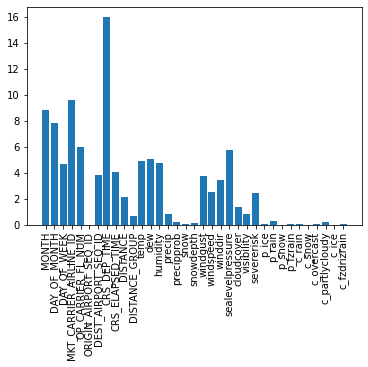

In [13]:
# Catboost

clf = CatBoostClassifier(random_state=42, loss_function='Logloss')
clf.fit(x_train, y_train)
cat_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, cat_pred))
cat_pred_proba = clf.predict_proba(x_test)[::,1]
print(cat_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  cat_pred_proba)
auc = roc_auc_score(y_test, cat_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("CatBoost ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, cat_pred_proba)
plt.plot(recall, precision, marker='.')
plt.title("CatBoost PR")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
print("PR AUC:", metrics.average_precision_score(y_test, cat_pred_proba))

print(confusion_matrix(y_test, cat_pred))

importance = clf.get_feature_importance()
plt.bar(x_train.columns, importance)
plt.xticks(rotation=90)
plt.show()


In [44]:
# create dataframe with all predicted values
df = pd.DataFrame({'Actual': y_test, 'Tree': tree_pred, 'Logistic': log_pred, 'MLP': mlp_pred, 'XGBoost': xgb_pred, 'CatBoost': cat_pred})
df.to_csv('AUS_Classification_Results.csv', index=False)